<a href="https://colab.research.google.com/github/rajaganesh1357/Time_Series_Repository/blob/main/Exponential_smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
data = pd.read_csv('https://raw.githubusercontent.com/rajaganesh1357/Dataset/main/perrin-freres-monthly-champagne-.csv')
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [42]:
data = data.rename(columns={"Month":"Date","Perrin Freres monthly champagne sales millions ?64-?72":"Value"})

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    105 non-null    object
 1   Value   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [44]:
data['Date']=pd.to_datetime(data['Date'],format='%Y-%m')
data = data.set_index('Date')
data.head()

,Value
Date,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


<Axes: xlabel='Date'>

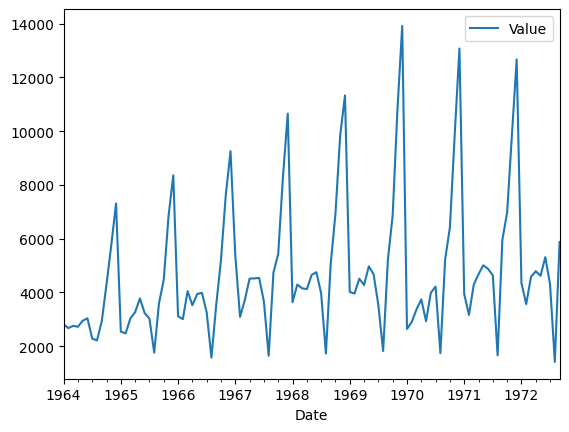

In [45]:
data.plot()

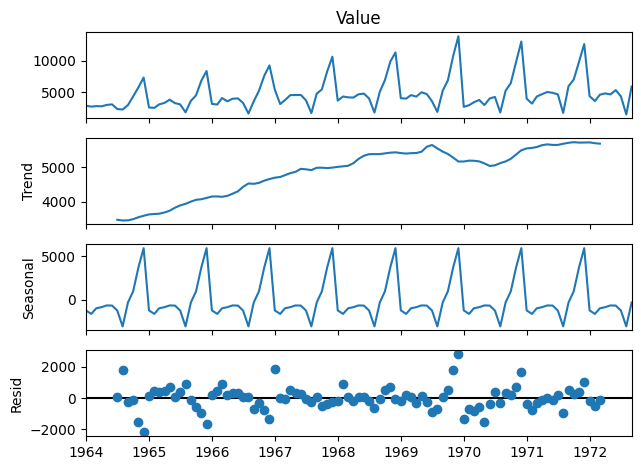

In [46]:
data_sd = seasonal_decompose(data['Value'])
data_sd.plot()
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data["Value"],test_size=0.20,random_state=123,shuffle=False)

The data exhibits seasonality, which means that single exponential smoothing and double exponential smoothing methods do not inherently account for seasonality. However, we are currently exploring the use of the level parameter (alpha) and trend parameter (beta) to analyze and potentially address the underlying trends in the data.



In [48]:
from statsmodels.tsa.api import SimpleExpSmoothing as SES
sesfit = SES(train, initialization_method="estimated").fit()
sesforecast = sesfit.forecast(21)
sesforecast.index=test.index
sesforecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Date
1971-01-01    12859.965054
1971-02-01    12859.965054
1971-03-01    12859.965054
1971-04-01    12859.965054
1971-05-01    12859.965054
1971-06-01    12859.965054
1971-07-01    12859.965054
1971-08-01    12859.965054
1971-09-01    12859.965054
1971-10-01    12859.965054
1971-11-01    12859.965054
1971-12-01    12859.965054
1972-01-01    12859.965054
1972-02-01    12859.965054
1972-03-01    12859.965054
1972-04-01    12859.965054
1972-05-01    12859.965054
1972-06-01    12859.965054
1972-07-01    12859.965054
1972-08-01    12859.965054
1972-09-01    12859.965054
dtype: float64

In [49]:
from statsmodels.tsa.api import Holt as DES
desfit = DES(train,initialization_method='estimated').fit()
despredict = desfit.forecast(21)
despredict.index = test.index
despredict

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Date
1971-01-01    12884.710084
1971-02-01    12952.943445
1971-03-01    13021.176807
1971-04-01    13089.410168
1971-05-01    13157.643529
1971-06-01    13225.876891
1971-07-01    13294.110252
1971-08-01    13362.343613
1971-09-01    13430.576975
1971-10-01    13498.810336
1971-11-01    13567.043697
1971-12-01    13635.277059
1972-01-01    13703.510420
1972-02-01    13771.743781
1972-03-01    13839.977143
1972-04-01    13908.210504
1972-05-01    13976.443865
1972-06-01    14044.677227
1972-07-01    14112.910588
1972-08-01    14181.143949
1972-09-01    14249.377311
dtype: float64

In [50]:
from statsmodels.tsa.api import ExponentialSmoothing as TES
tesfit =TES(train,initialization_method='estimated',trend='additive',seasonal='additive',use_boxcox=True).fit()
tespredict= tesfit.forecast(21)
tespredict.index=test.index
tespredict

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Date
1971-01-01     3860.178666
1971-02-01     3639.494282
1971-03-01     4204.315242
1971-04-01     4326.800084
1971-05-01     4556.490483
1971-06-01     4680.078990
1971-07-01     3909.746105
1971-08-01     2007.498409
1971-09-01     4946.216946
1971-10-01     6627.999839
1971-11-01    10002.173598
1971-12-01    12701.174962
1972-01-01     4081.926055
1972-02-01     3844.825047
1972-03-01     4452.243246
1972-04-01     4584.210444
1972-05-01     4831.906558
1972-06-01     4965.301272
1972-07-01     4135.221479
1972-08-01     2101.928580
1972-09-01     5252.827981
dtype: float64

In [51]:
print(tesfit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Value   No. Observations:                   84
Model:             ExponentialSmoothing   SSE                       23292439.962
Optimized:                         True   AIC                           1084.757
Trend:                         Additive   BIC                           1123.650
Seasonal:                      Additive   AICC                          1095.280
Seasonal Periods:                    12   Date:                 Fri, 08 Sep 2023
Box-Cox:                           True   Time:                         09:50:12
Box-Cox Coeff.:                -0.29581                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1637911                alpha                 True
smoothing_trend          

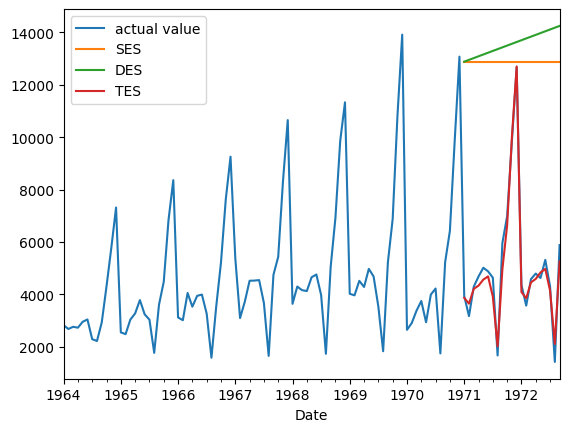

In [52]:
ES=pd.concat([data['Value'],sesforecast,despredict,tespredict],axis=1).plot()
ES.legend(['actual value','SES','DES','TES'])
plt.show()

In [53]:
mae = mean_absolute_error(test, tespredict)
mse = mean_squared_error(test, tespredict)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 340.6402191358221
Mean Squared Error (MSE): 174825.1914972926
Root Mean Squared Error (RMSE): 418.12102494049805
